# notebook made for visualizing the predictions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [8]:
# loading the CNN model and data
path = os.getcwd()
model = load_model(path + "/models/CNN_Traffic_gen.h5")

# loading the croped test data
X = np.load( path + "/processed_data/data_nor_test_cropped.npy")
y = np.load( path + "/processed_data/labels_nor_test_cropped.npy")


# in case you want to check grayscale visualized result
# model = load_model(path + "/models/CNN_Traffic_gen_gray.h5")

# # loading the croped test data
# X = np.load( path + "/processed_data/data_nor_test_cropped_gray.npy")
# y = np.load( path + "/processed_data/labels_nor_test_cropped_gray.npy")


x_meta = np.load( path + "/processed_data/data_ger_meta.npy")

In [9]:
# getting the 3 highest model predictions 
y_pred = model.predict(X)
indexes = np.argsort(y_pred, axis=1)[:, -3:]
shape_y_pred = y_pred.shape[0]
prediction_values = y_pred[np.repeat(np.arange(shape_y_pred), 3), indexes.ravel()].reshape(shape_y_pred, 3)

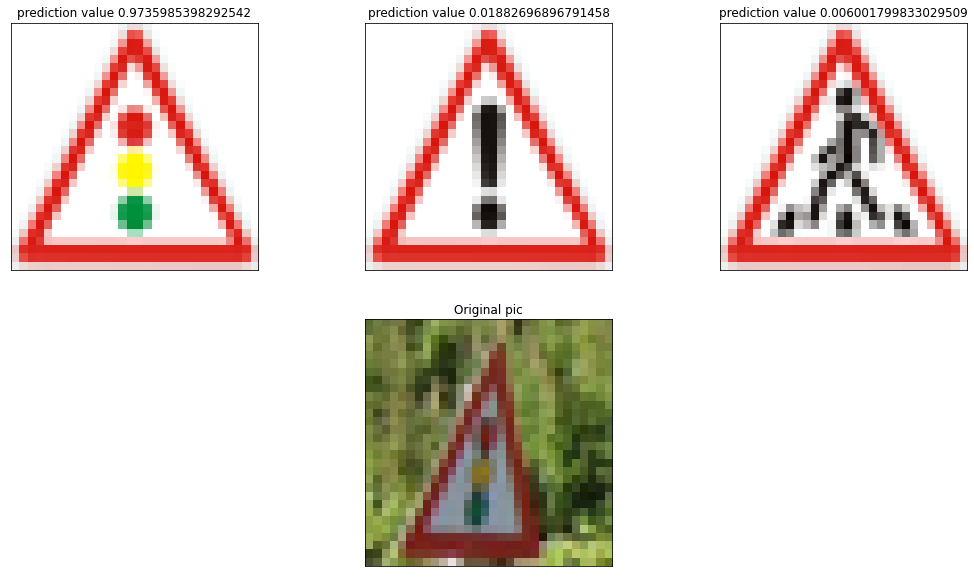

In [14]:
# function for visualizong the three highest predictions
def showPred(i):
    plt.figure(figsize=(18, 10))
    ax4 = plt.subplot(2,1,2)
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)
    ax3 = plt.subplot(2,3,3)
    
    ax1.imshow(x_meta[indexes[i][2]])
    ax1.title.set_text(f"prediction value {prediction_values[i][2]}")
    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    ax2.imshow(x_meta[indexes[i][1]])
    ax2.title.set_text(f"prediction value {prediction_values[i][1]}")
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    ax3.imshow(x_meta[indexes[i][0]])
    ax3.title.set_text(f"prediction value {prediction_values[i][0]}")
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax4.imshow(X[i], cmap='gray', vmin=0, vmax=255)
    ax4.title.set_text(f"Original pic")
    ax4.xaxis.set_visible(False)
    ax4.yaxis.set_visible(False)
    plt.show()

showPred(44)

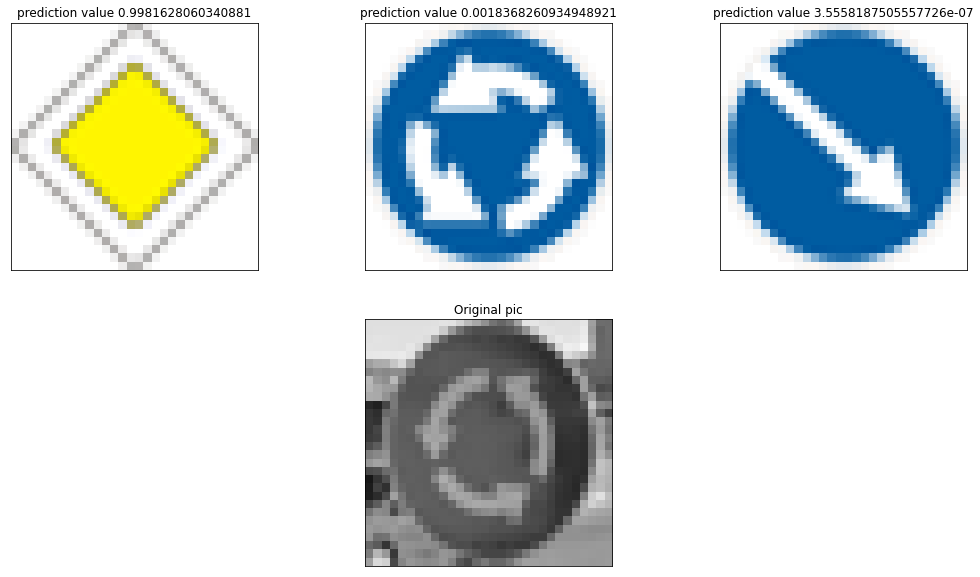

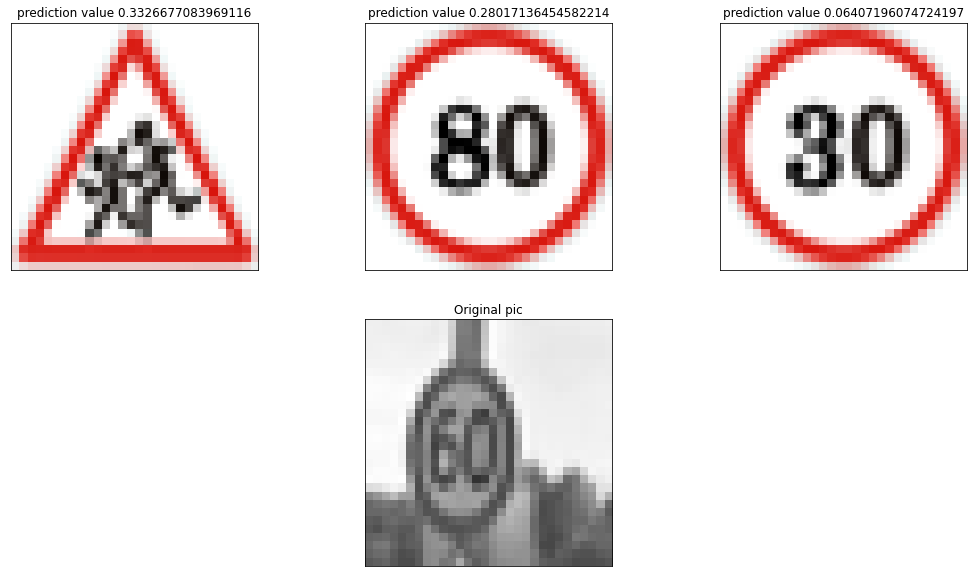

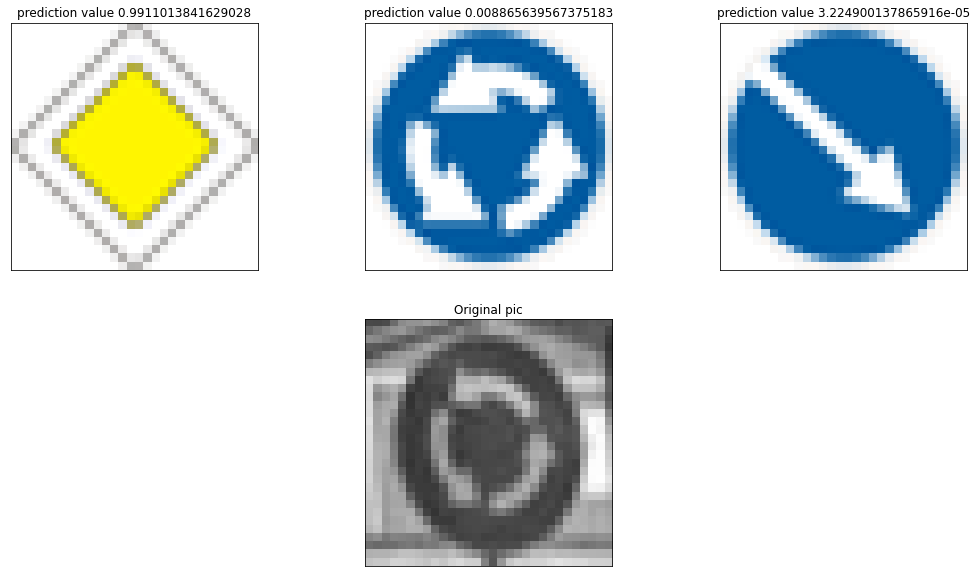

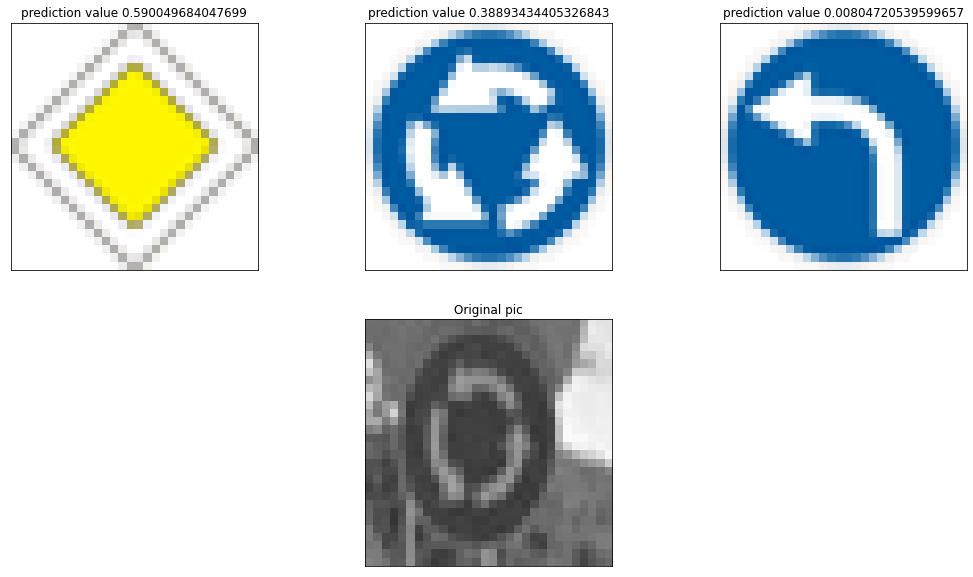

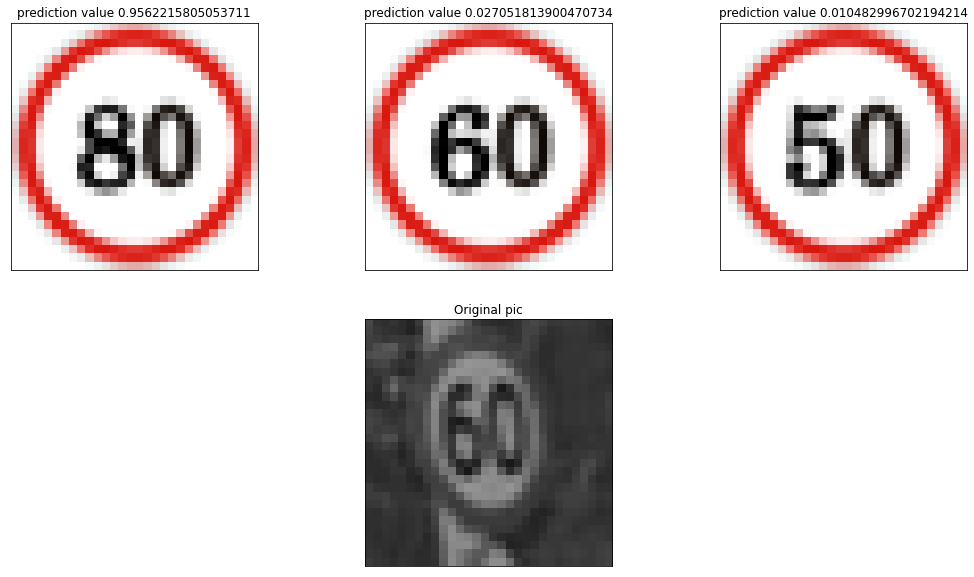

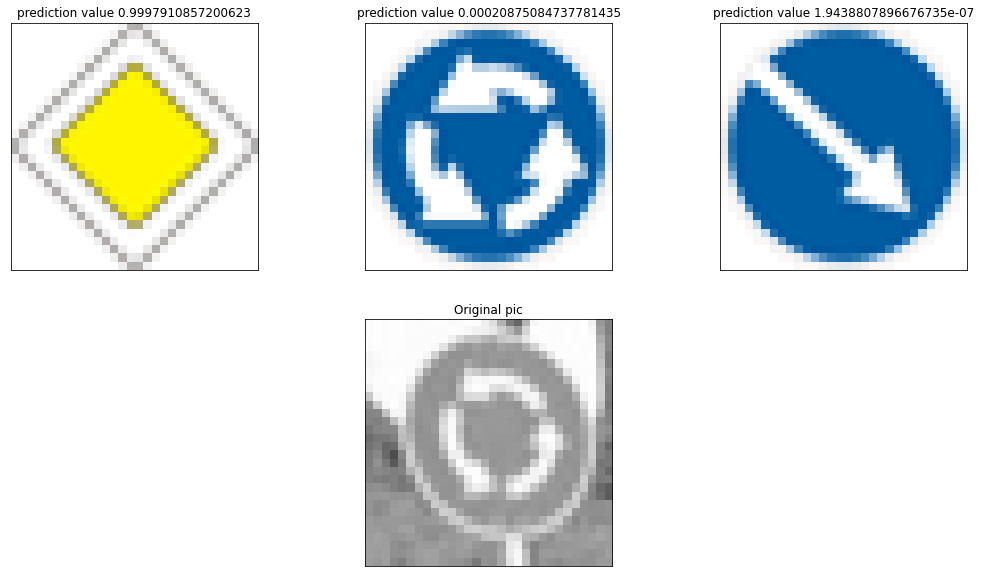

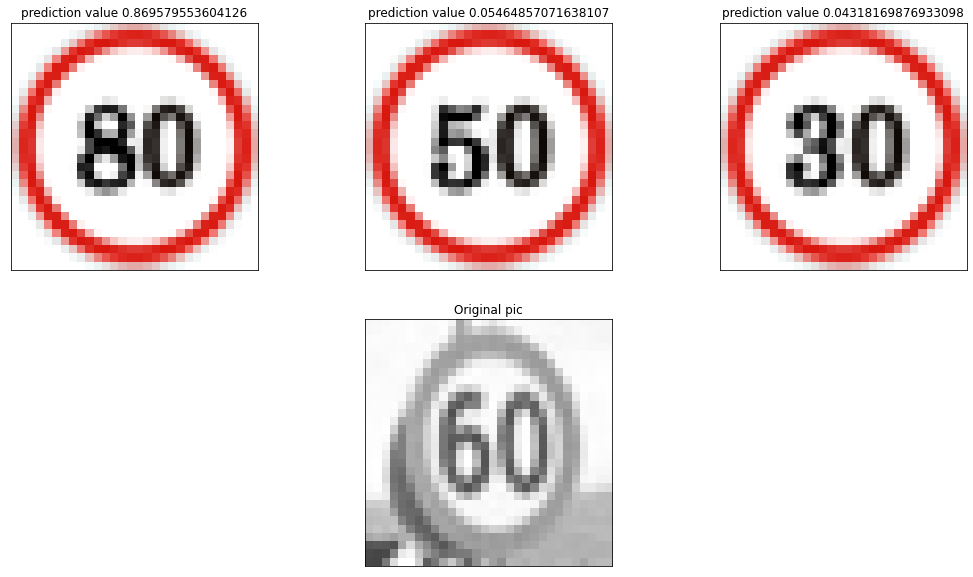

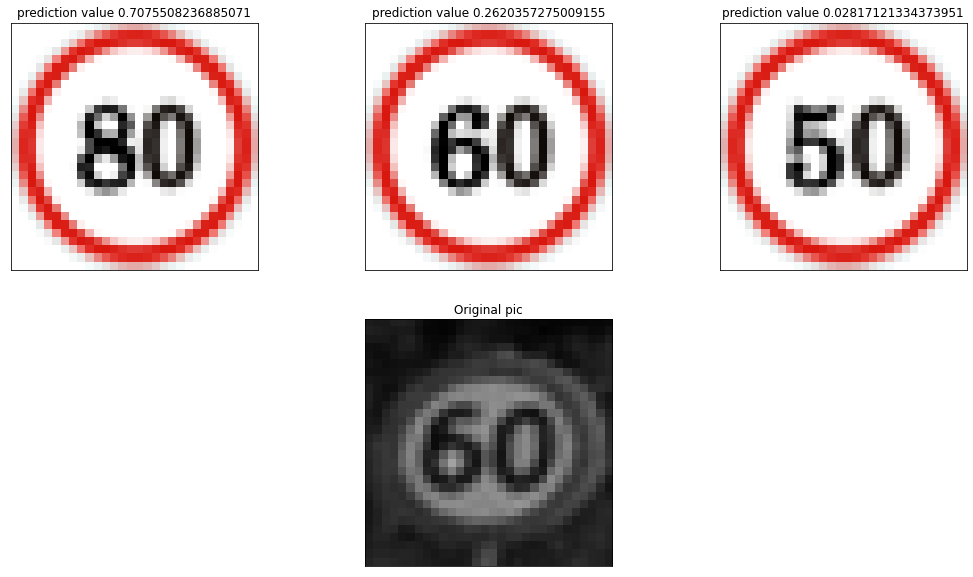

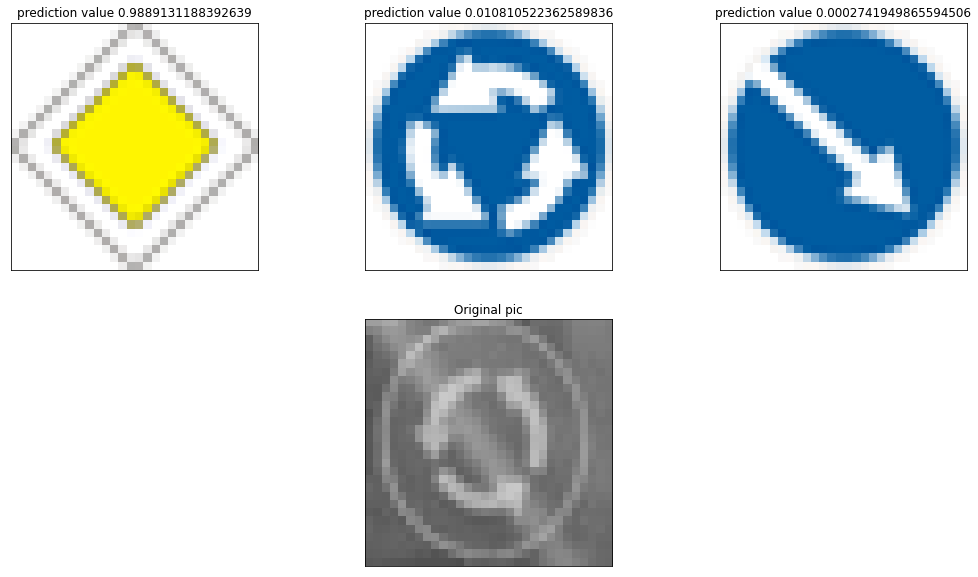

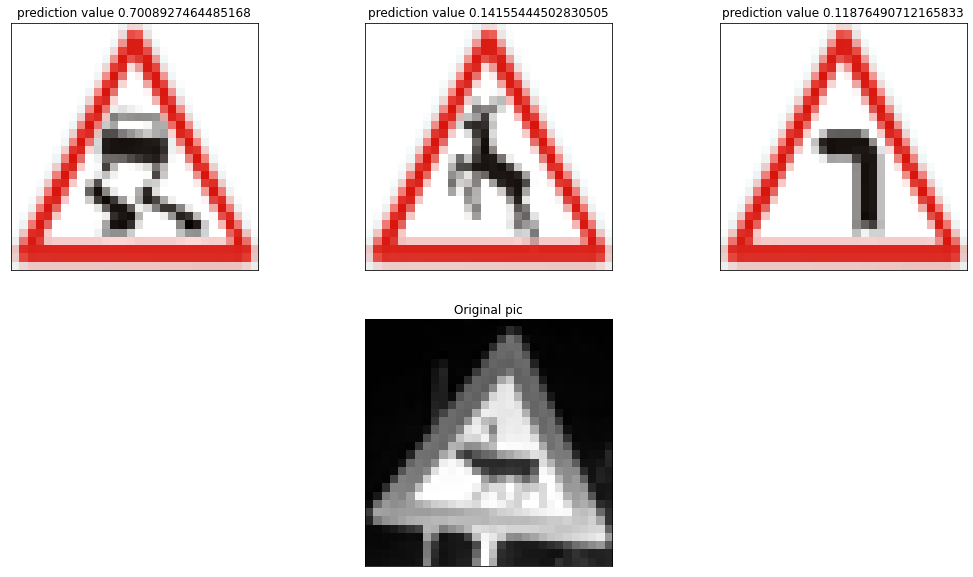

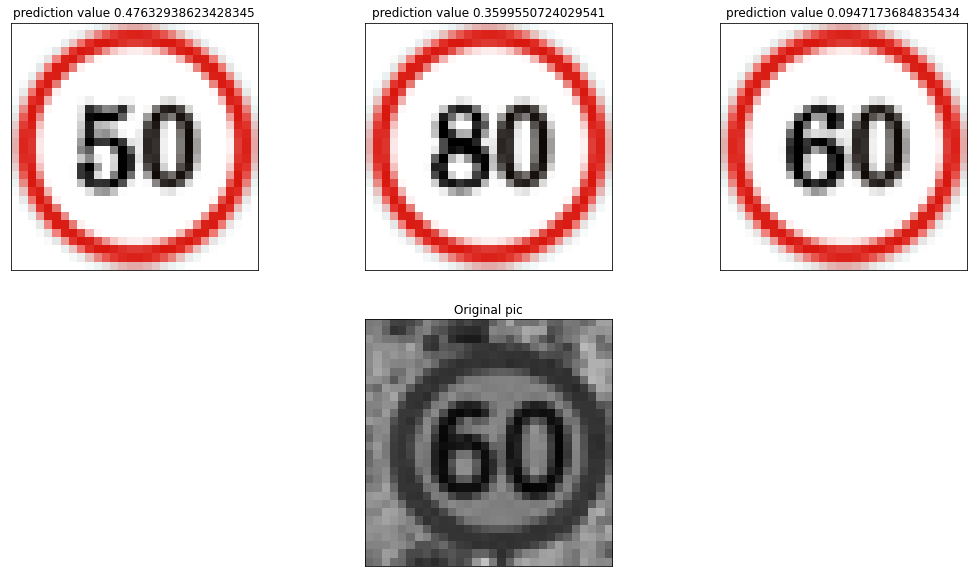

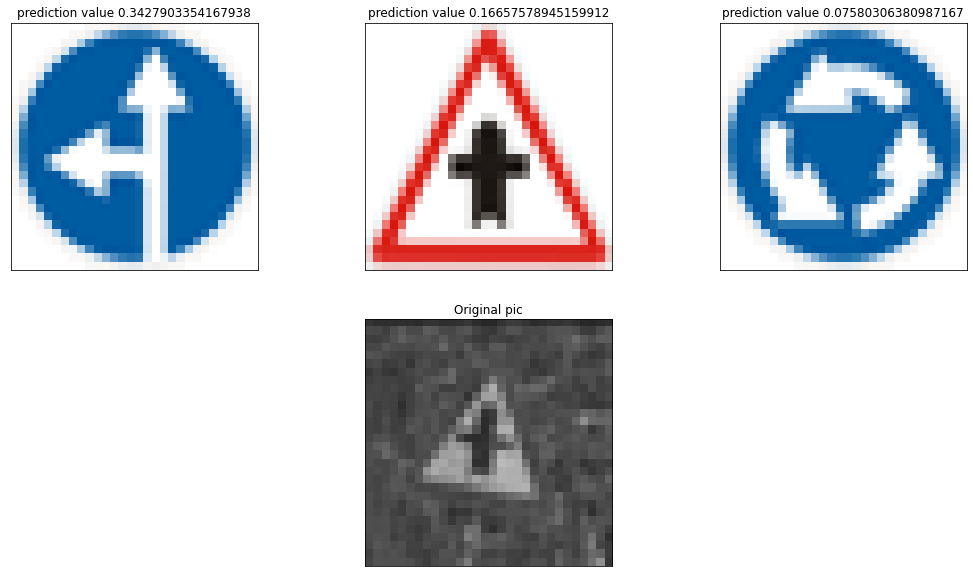

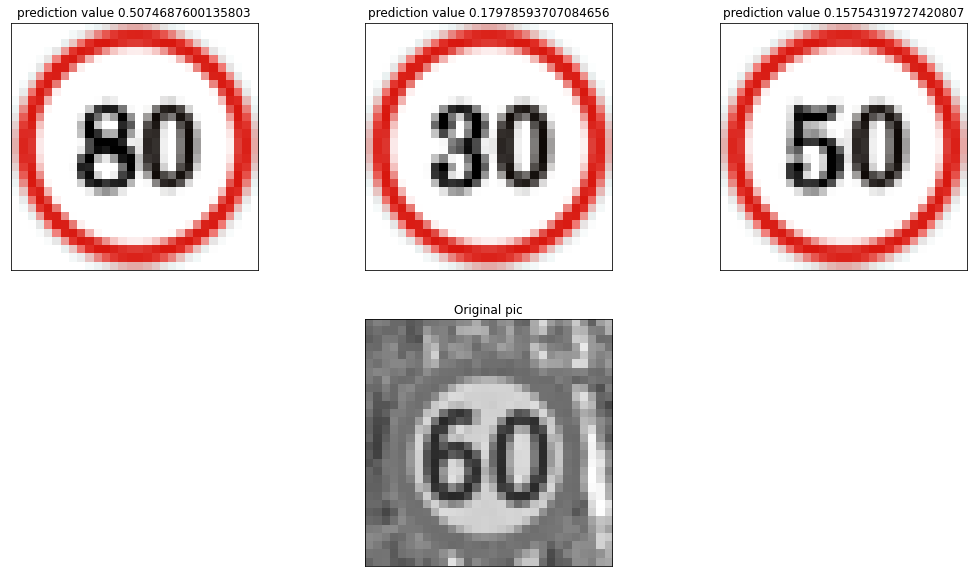

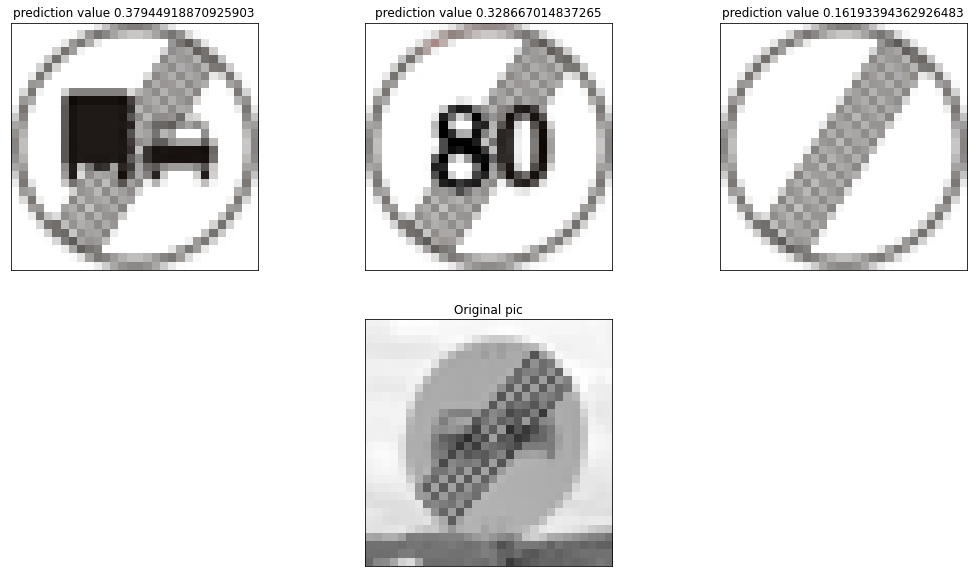

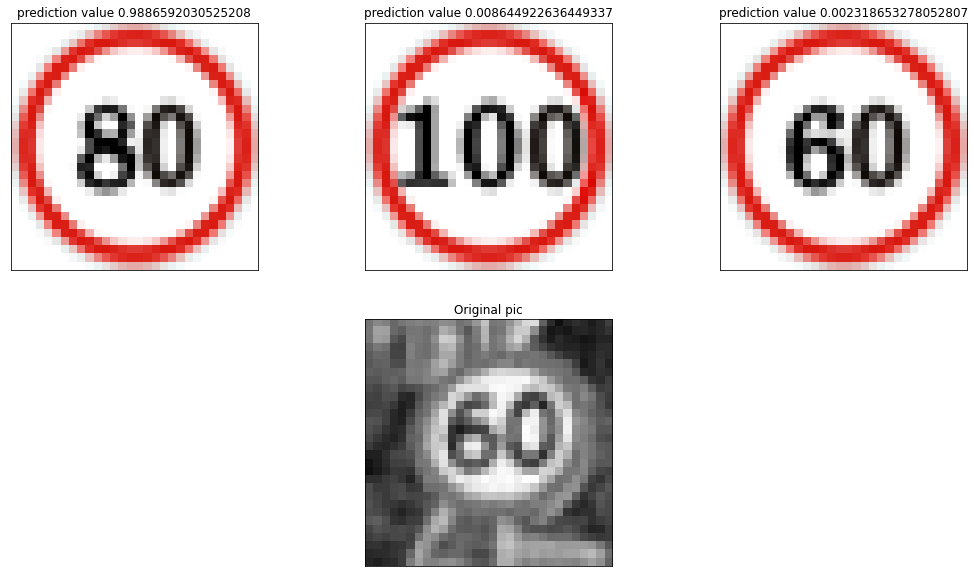

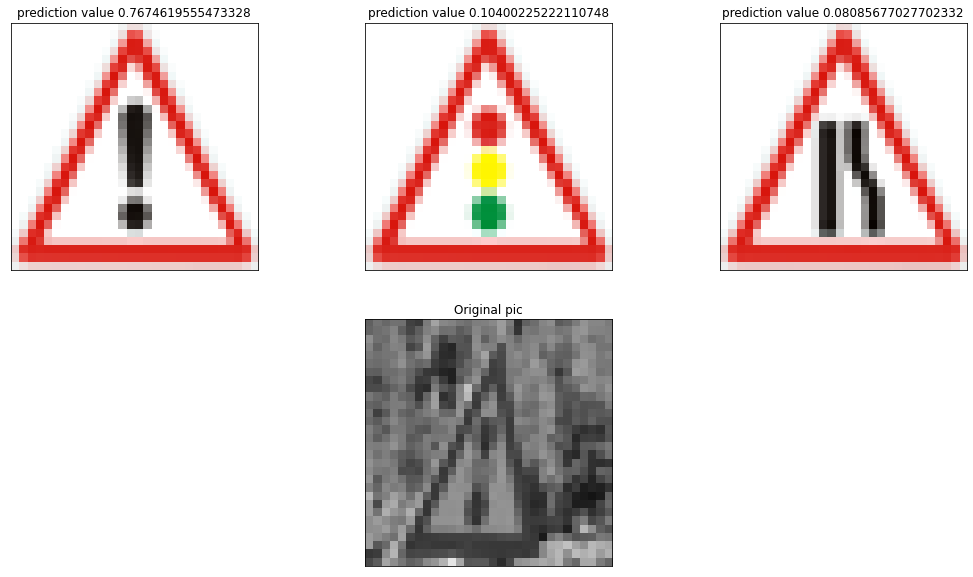

In [7]:
# plotting the wrong predictions
for i in range(len(y)):
    if(indexes[i][2] != y[i] ):
        showPred(i)